<a href="https://colab.research.google.com/github/Shahedur23036883/Cerebral-Stroke-Prediction/blob/main/cerebral_stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Step 1: Load the dataset

In [176]:
df=pd.read_csv("//content/dataset.csv.zip")

In [177]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


# Step 2: Exploratory Data Analysis (EDA)

In [51]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [52]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


In [53]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [54]:
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [55]:
df.shape

(43400, 12)

In [56]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [170]:
df.isnull().sum()

,0
id,0
age,0
hypertension,0
heart_disease,0
avg_glucose_level,0
bmi,1462
stroke,0
gender_Male,0
gender_Other,0
ever_married_Yes,0


# Check duplicates

In [171]:
df.duplicated().sum()

0

# Drop duplicates

In [172]:
df.drop_duplicates(inplace=True)
print('\nNumber of duplicates after dropping')
print(df.duplicated().sum())


Number of duplicates after dropping
0


In [173]:
# Handle missing values

In [178]:
# For smoking_status, fill with 'Unknown' (as done in New EDA)
print('\nMissing smoking_status values: ' + str(df['smoking_status'].isna().sum()) + ' out of ' + str(len(df)) + ' rows')
df['smoking_status'] = df['smoking_status'].fillna('Unknown')


Missing smoking_status values: 13292 out of 43400 rows


# Drop rows with any remaining missing values

In [90]:
df.dropna(inplace=True)

# Verify cleaned dataset

In [179]:
print('\nDataset info after cleaning:')
print(df.info())
print('\nUpdated Dataset:')
print(df)


Dataset info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     43400 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB
None

Updated Dataset:
          id  gender   age  hypertension  heart_disease ever_married  \
0      30669    Male   3.0      

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41938 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 41938 non-null  int64  
 1   gender             41938 non-null  object 
 2   age                41938 non-null  float64
 3   hypertension       41938 non-null  int64  
 4   heart_disease      41938 non-null  int64  
 5   ever_married       41938 non-null  object 
 6   work_type          41938 non-null  object 
 7   Residence_type     41938 non-null  object 
 8   avg_glucose_level  41938 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     41938 non-null  object 
 11  stroke             41938 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.2+ MB


# Step 4: Initial Exploratory Data Analysis (EDA)

# Summary statistics

In [64]:
print(df.describe())

                 id          age  hypertension  heart_disease  \
count  41938.000000  41938.00000  41938.000000   41938.000000   
mean   36816.046760     41.83929      0.087510       0.043111   
std    20916.478029     22.48366      0.282585       0.203110   
min        1.000000      0.08000      0.000000       0.000000   
25%    18773.250000     24.00000      0.000000       0.000000   
50%    36989.500000     43.00000      0.000000       0.000000   
75%    54860.750000     59.00000      0.000000       0.000000   
max    72943.000000     82.00000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       41938.000000  41938.000000  41938.000000  
mean          103.632645     28.605038      0.015332  
std            42.229814      7.770020      0.122872  
min            55.000000     10.100000      0.000000  
25%            77.370000     23.200000      0.000000  
50%            91.320000     27.700000      0.000000  
75%           111.480000     

# Stroke value counts

In [65]:
print(df.stroke.value_counts())

stroke
0    41295
1      643
Name: count, dtype: int64


# Histograms for all numerical columns

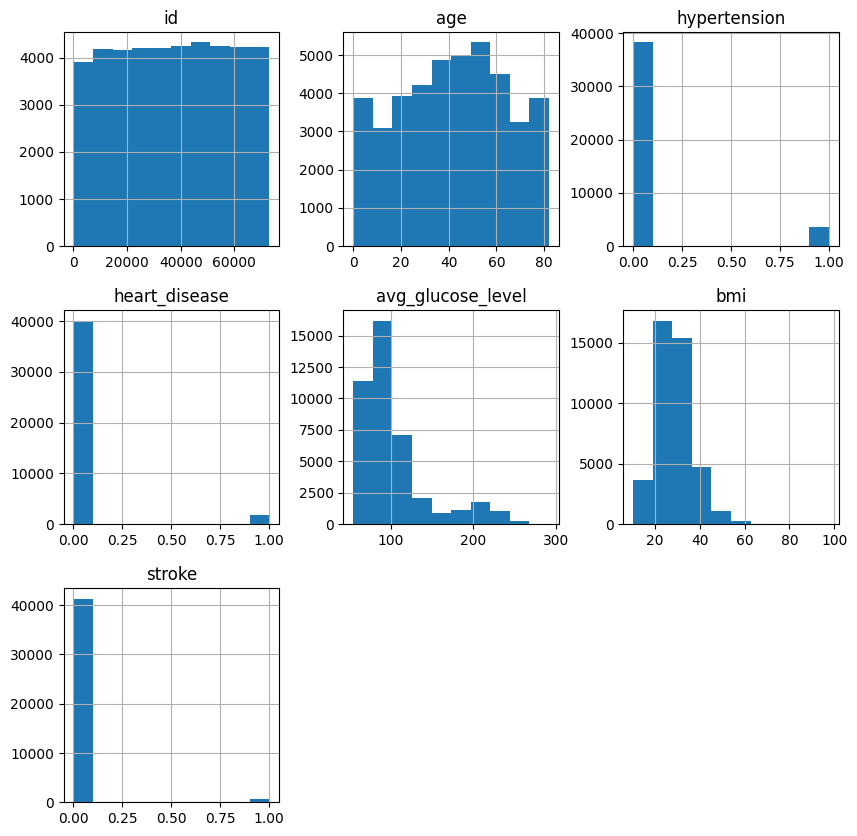

In [66]:
df.hist(figsize=(10, 10))
plt.show()

# Distribution of numerical columns with KDE

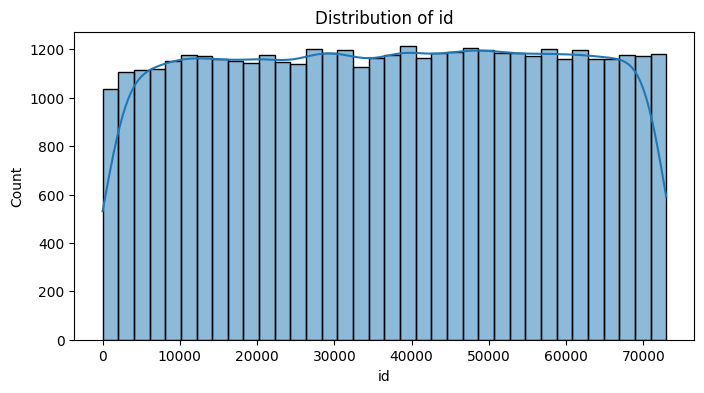

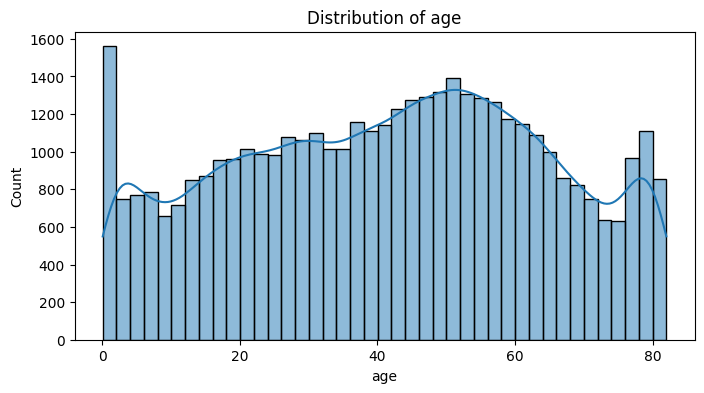

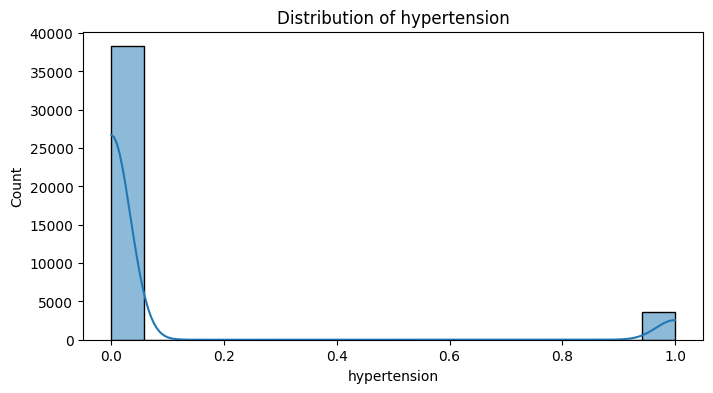

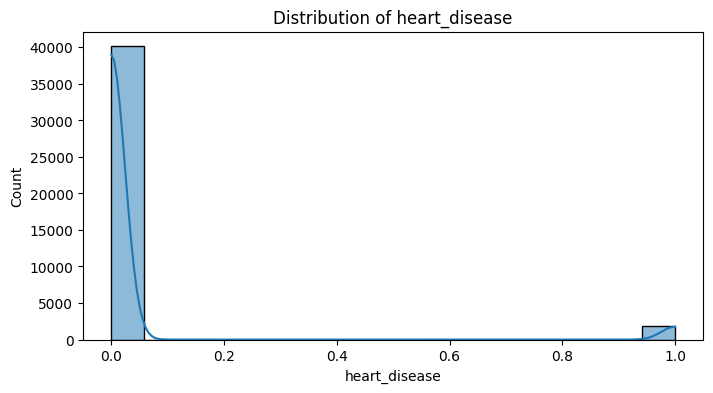

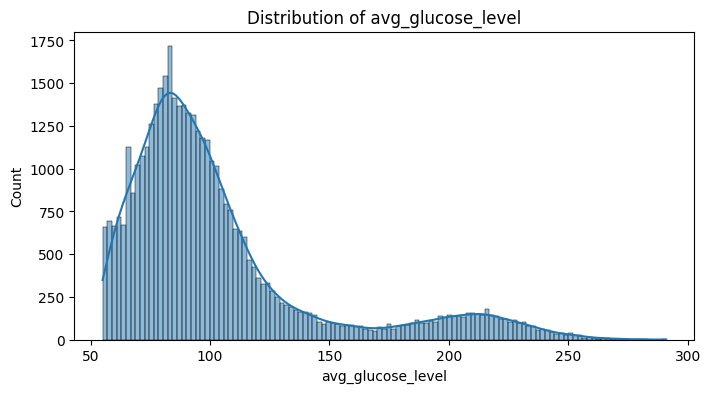

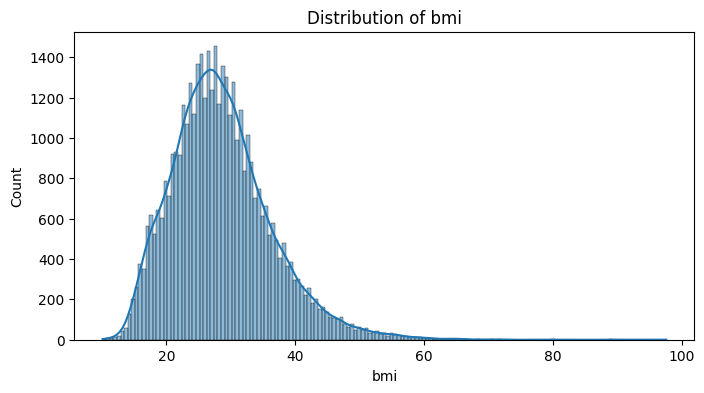

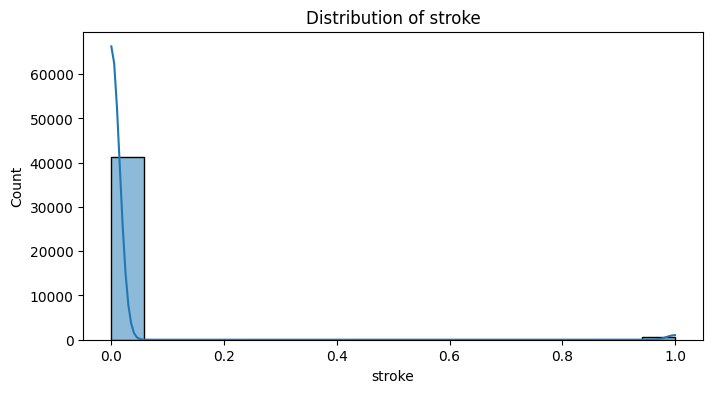

In [67]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Distribution of categorical columns

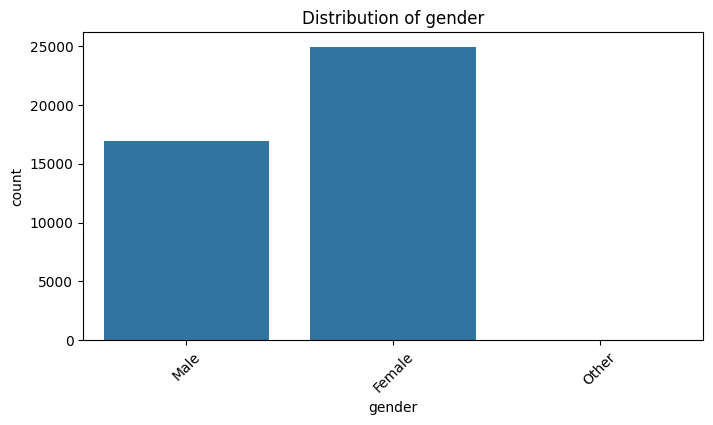

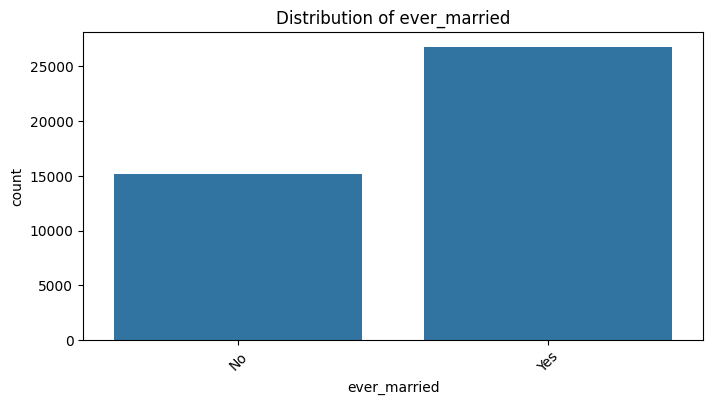

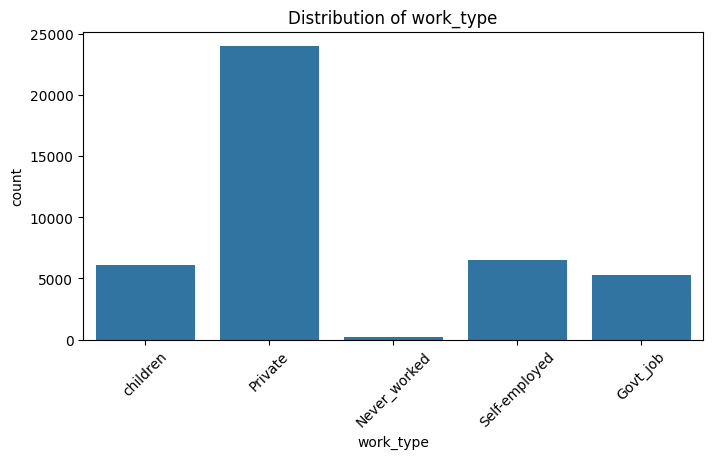

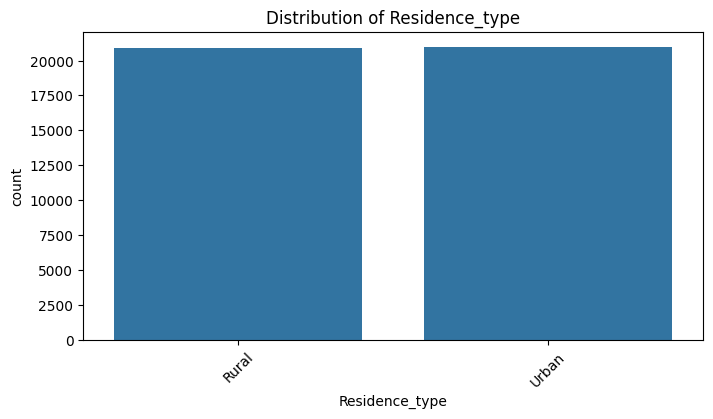

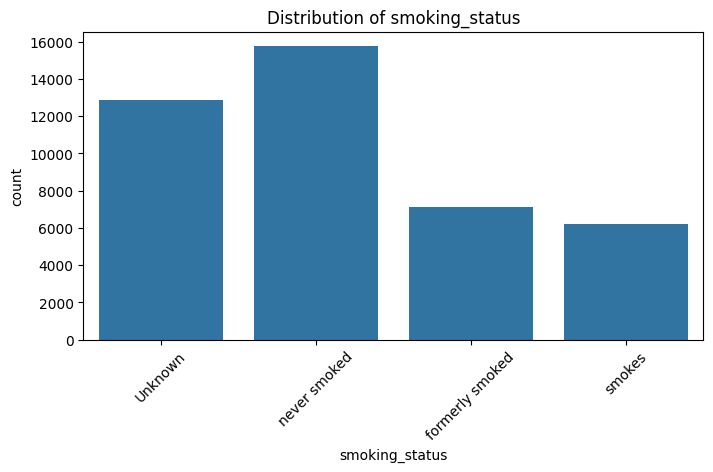

In [68]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Step 5: Feature Engineering

# Convert categorical variables to numerical

In [99]:
df=pd.read_csv("//content/dataset.csv.zip")

In [100]:
# Assuming 'df' contains the original data with the required columns:
eda_data = df.copy()  # Assign a copy of the 'df' to 'eda_data'
# Check if the columns exist in eda_data
required_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
missing_columns = [col for col in required_columns if col not in eda_data.columns]

# If any columns are missing, print an error message
if missing_columns:
    raise KeyError(f"The following columns are missing in eda_data: {missing_columns}")

# If all columns are present, proceed with get_dummies
df = pd.get_dummies(eda_data, columns=required_columns, drop_first=True)

# Create age groups

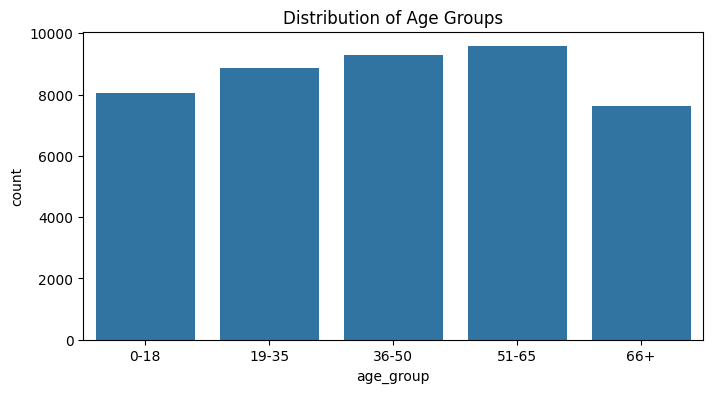

In [105]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+'])
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='age_group')
plt.title('Distribution of Age Groups')
plt.show()

# Create BMI categories

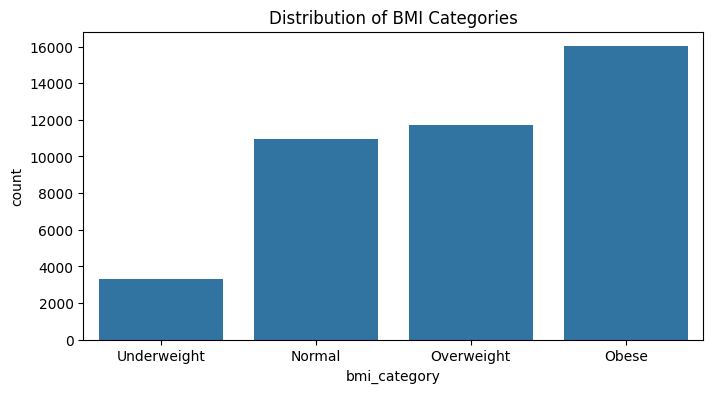

In [107]:
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='bmi_category')
plt.title('Distribution of BMI Categories')
plt.show()

# Create glucose categories

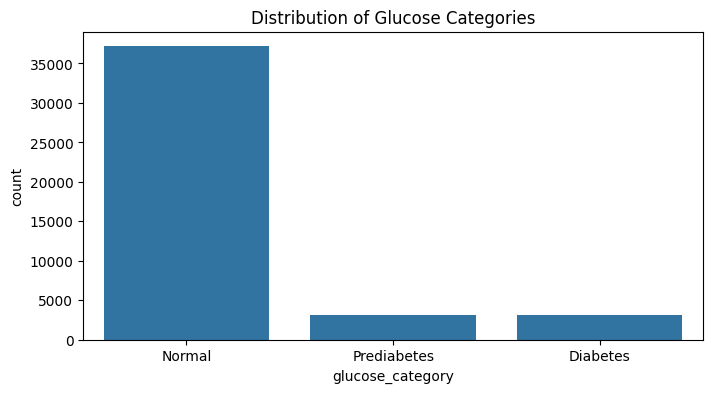

In [108]:
df['glucose_category'] = pd.cut(df['avg_glucose_level'], bins=[0, 140, 200, 300], labels=['Normal', 'Prediabetes', 'Diabetes'])
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='glucose_category')
plt.title('Distribution of Glucose Categories')
plt.show()

# Create stroke occurrence column

In [109]:
df['stroke_occurred'] = df['stroke'].apply(lambda x: 1 if x == 1 else 0)
print(df['stroke_occurred'])

0        0
1        0
2        0
3        0
4        0
        ..
43395    0
43396    0
43397    0
43398    0
43399    0
Name: stroke_occurred, Length: 43400, dtype: int64


# Step 6: Correlation Analysis

                         id       age  hypertension  heart_disease  \
id                 1.000000  0.012760      0.006571       0.009234   
age                0.012760  1.000000      0.272169       0.250188   
hypertension       0.006571  0.272169      1.000000       0.119777   
heart_disease      0.009234  0.250188      0.119777       1.000000   
avg_glucose_level  0.024634  0.237627      0.160211       0.146938   
bmi                0.018839  0.358897      0.161225       0.057677   
stroke             0.002976  0.156049      0.075332       0.113763   
stroke_occurred    0.002976  0.156049      0.075332       0.113763   

                   avg_glucose_level       bmi    stroke  stroke_occurred  
id                          0.024634  0.018839  0.002976         0.002976  
age                         0.237627  0.358897  0.156049         0.156049  
hypertension                0.160211  0.161225  0.075332         0.075332  
heart_disease               0.146938  0.057677  0.113763         

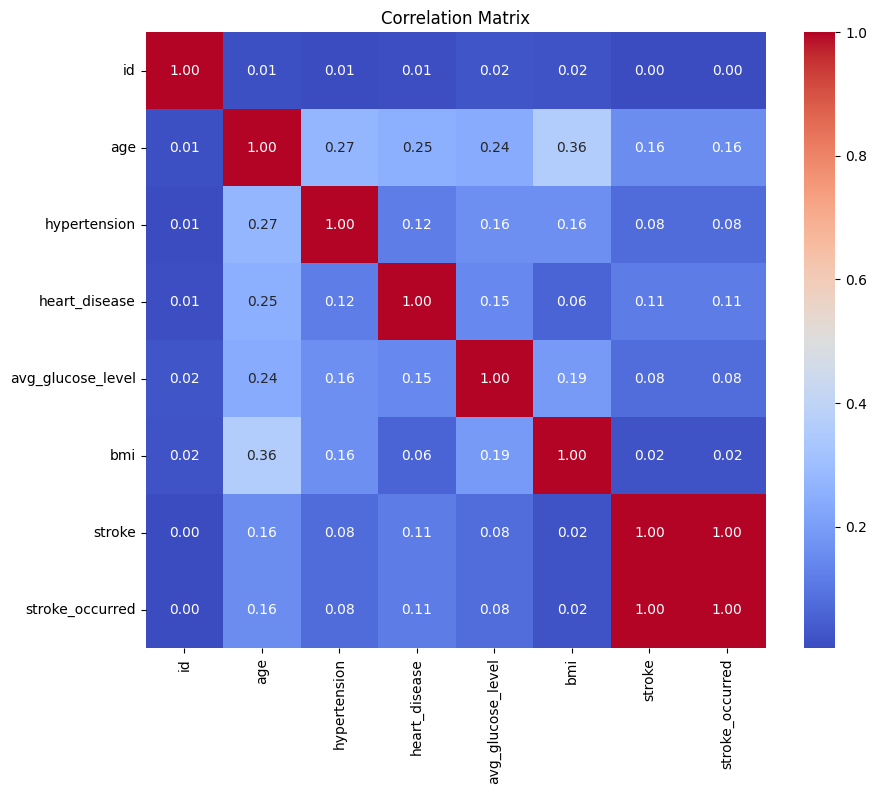

In [112]:
# Calculate correlations only on numerical features
numerical_features = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_features].corr()

# Display the correlation matrix
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Correlation with stroke

\nCorrelation with stroke (sorted):
stroke_occurred                1.000000
stroke                         1.000000
age                            0.156049
heart_disease                  0.113763
avg_glucose_level              0.078917
hypertension                   0.075332
ever_married_Yes               0.071920
work_type_Self-employed        0.061195
bmi                            0.020285
gender_Male                    0.011352
smoking_status_smokes          0.007061
id                             0.002976
Residence_type_Urban           0.002247
smoking_status_never smoked   -0.002015
gender_Other                  -0.002158
work_type_Private             -0.002464
work_type_Never_worked        -0.008674
work_type_children            -0.054115
Name: stroke, dtype: float64


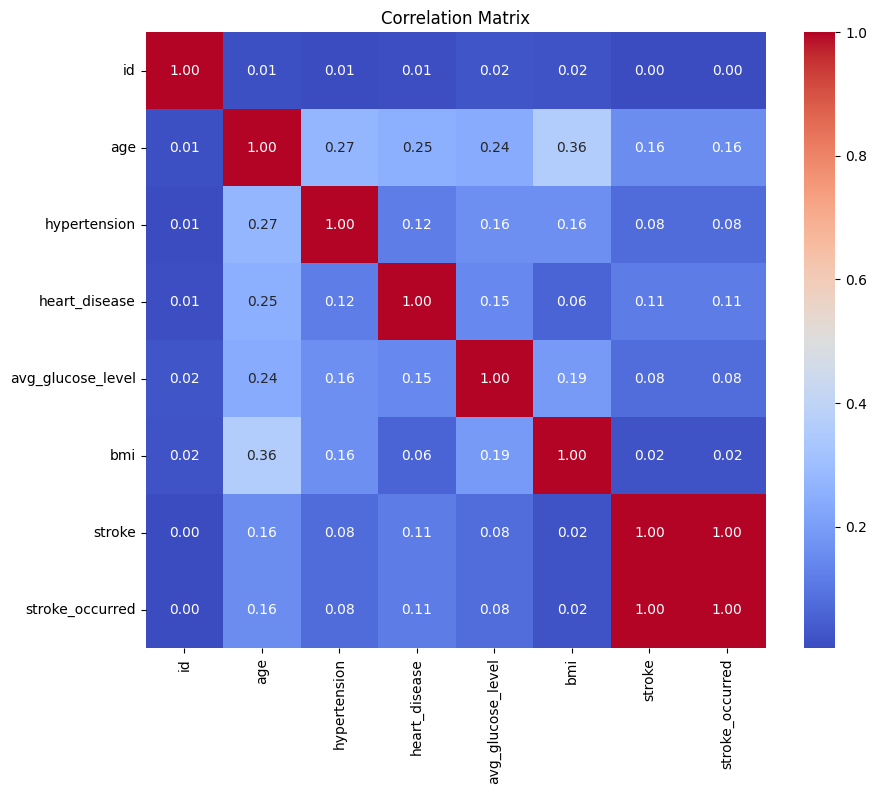

In [120]:
print('\\nCorrelation with stroke (sorted):')
print(df.corr(numeric_only=True)['stroke'].sort_values(ascending=False))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Visualize correlations

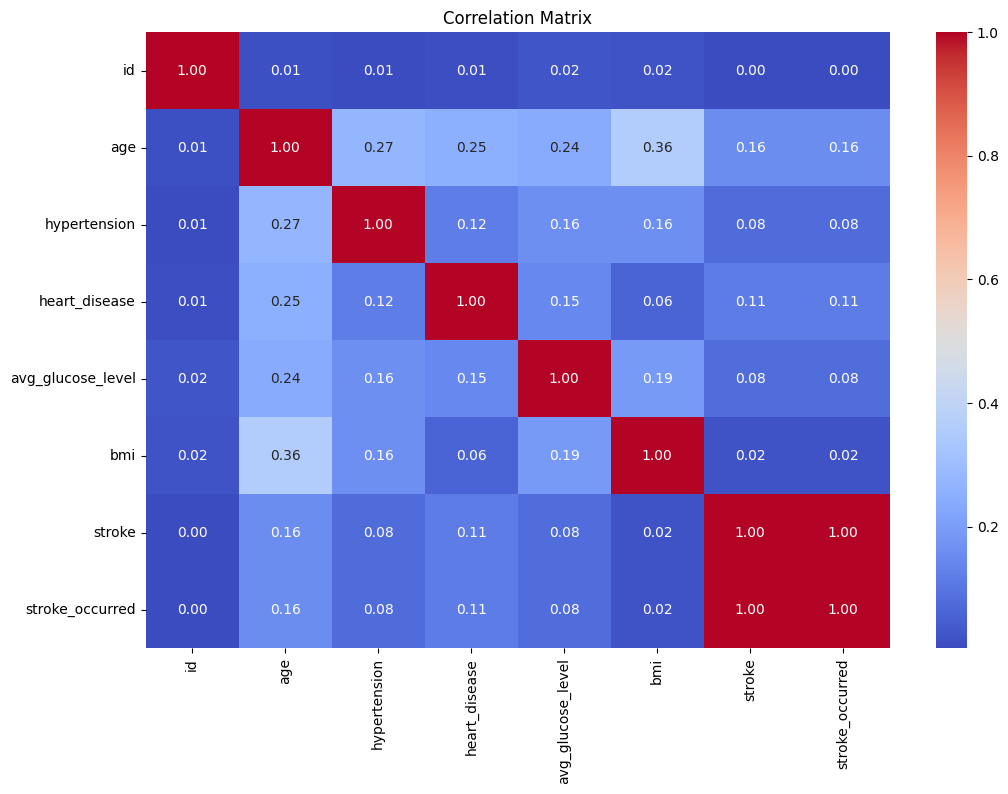

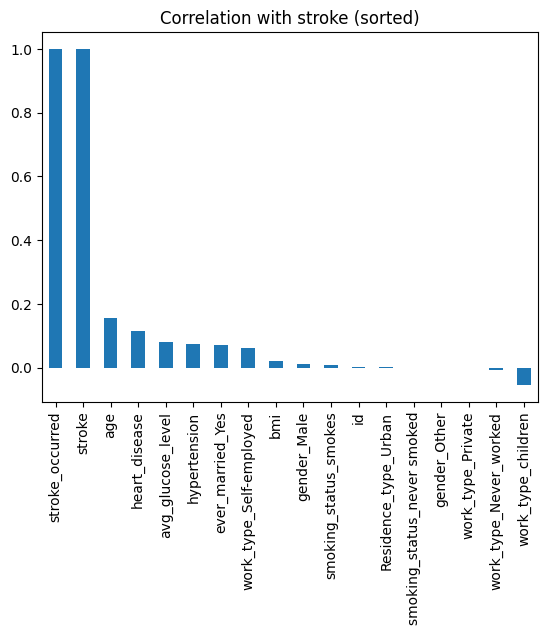

In [122]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
df.corr(numeric_only=True)['stroke'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation with stroke (sorted)')
plt.show()

# Pie chart of positive correlations

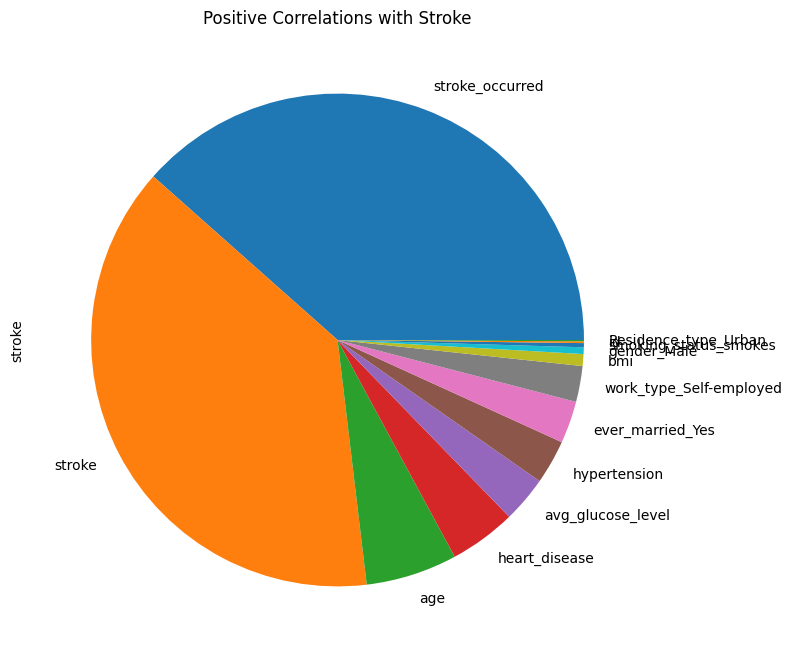

In [126]:
correlation_with_stroke = df.corr(numeric_only=True)['stroke'].sort_values(ascending=False)
positive_corr = correlation_with_stroke[correlation_with_stroke >= 0]
positive_corr.plot(kind='pie', figsize=(8, 8))
plt.title('Positive Correlations with Stroke')
plt.show()

# Step 7: Visualizing Distributions and Relationships

# Distribution of target variable 'stroke

<ipython-input-127-f44846530d4b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='Set2')


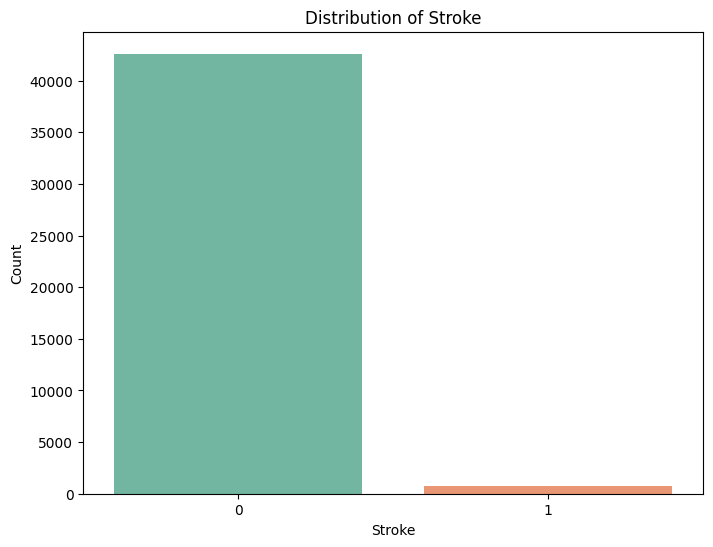

In [127]:
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=df, palette='Set2')
plt.title('Distribution of Stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

# Age groups distribution

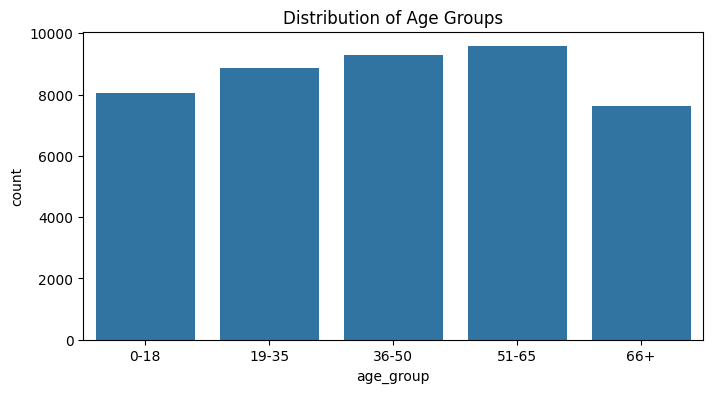

In [129]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='age_group')
plt.title('Distribution of Age Groups')
plt.show()

# BMI categories distribution

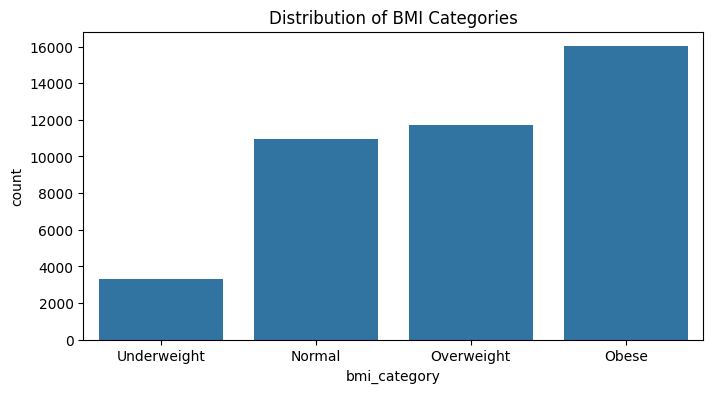

In [130]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='bmi_category')
plt.title('Distribution of BMI Categories')
plt.show()

# Stroke occurrence by age

In [134]:
age_stroke = df.groupby('age')['stroke_occurred'].mean().reset_index()
fig = px.line(age_stroke, x='age', y='stroke_occurred',
              title='Stroke Occurrence by Age',
              labels={'stroke_occurred': 'Probability of Stroke', 'age': 'Age'},
              markers=True)
fig.show()

# Stroke probability by smoking status

In [141]:
# Assuming your original dataframe with 'smoking_status' is named 'eda_data':
smoking_stroke_probabilities = eda_data.groupby("smoking_status")["stroke"].mean().reset_index()
# Use eda_data instead of df

print("\nStroke Probabilities by Smoking Status:")
print(smoking_stroke_probabilities)
fig = px.pie(smoking_stroke_probabilities, values='stroke',
             names='smoking_status',
             title='Stroke Probability by Smoking Status',
             color_discrete_sequence=px.colors.sequential.OrRd_r)
fig.show()


Stroke Probabilities by Smoking Status:
    smoking_status    stroke
0  formerly smoked  0.029494
1     never smoked  0.017691
2           smokes  0.020268


# Stroke probability by work type

In [144]:
worktype_stroke_probabilities = eda_data.groupby("work_type")["stroke"].mean().reset_index() # Use eda_data instead of df
print("\nStroke Probabilities by Work Type:")
print(worktype_stroke_probabilities)
fig = px.scatter(worktype_stroke_probabilities, x='work_type', y='stroke',
                     size='stroke', color='work_type',
                     title='Work Type vs Stroke Probability',
                     labels={'stroke': 'Stroke Probability', 'work_type': 'Work Type'})
fig.show()


Stroke Probabilities by Work Type:
       work_type    stroke
0       Govt_job  0.016360
1   Never_worked  0.000000
2        Private  0.017758
3  Self-employed  0.036950
4       children  0.000325


# Stroke risk by age brackets

<ipython-input-145-44b76900f597>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-145-44b76900f597>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '(0, 18]'),
  Text(1, 0, '(18, 30]'),
  Text(2, 0, '(30, 45]'),
  Text(3, 0, '(45, 60]'),
  Text(4, 0, '(60, 75]'),
  Text(5, 0, '(75, 90]')])

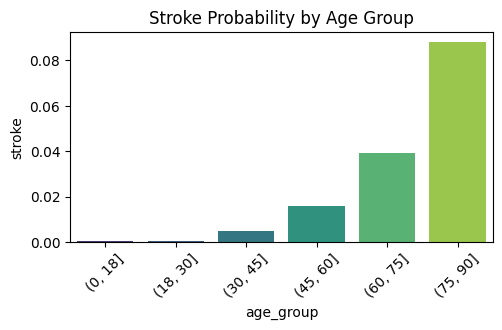

In [145]:
plt.figure(figsize=(12, 6))
age_bins = [0, 18, 30, 45, 60, 75, 90]
df['age_group'] = pd.cut(df['age'], bins=age_bins)
age_stroke = df.groupby('age_group')['stroke'].mean().reset_index()
plt.subplot(2, 2, 1)
sns.barplot(x='age_group', y='stroke', data=age_stroke, palette='viridis')
plt.title('Stroke Probability by Age Group')
plt.xticks(rotation=45)


# Hypertension & heart disease interaction

<ipython-input-146-68a00bedfc23>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Stroke Risk by Medical Conditions')

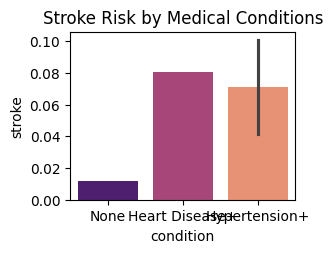

In [146]:
conditions = df.groupby(['hypertension', 'heart_disease'])['stroke'].mean().reset_index()
conditions['condition'] = conditions.apply(lambda x:
    "Hypertension+" if x['hypertension'] else
    "Heart Disease+" if x['heart_disease'] else
    "Both+"
    if x['hypertension'] and x['heart_disease'] else
    "None", axis=1)
plt.subplot(2, 2, 2)
sns.barplot(x='condition', y='stroke', data=conditions, palette='magma')
plt.title('Stroke Risk by Medical Conditions')


# Glucose level impact

<ipython-input-147-01842798076e>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Text(0.5, 1.0, 'Stroke Risk by Glucose Levels')

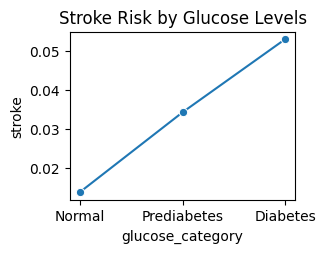

In [147]:
glucose_bins = [0, 140, 200, 300]
df['glucose_category'] = pd.cut(df['avg_glucose_level'], bins=glucose_bins,
                              labels=['Normal', 'Prediabetes', 'Diabetes'])
glucose_stroke = df.groupby('glucose_category')['stroke'].mean().reset_index()
plt.subplot(2, 2, 3)
sns.lineplot(x='glucose_category', y='stroke', data=glucose_stroke, marker='o')
plt.title('Stroke Risk by Glucose Levels')


# BMI categories analysis

<ipython-input-148-c19c55e34b67>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-148-c19c55e34b67>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




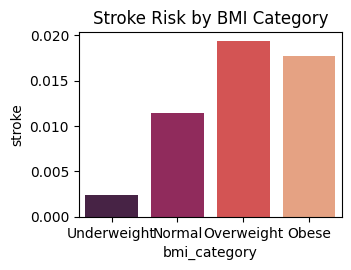

In [148]:
bmi_bins = [0, 18.5, 25, 30, 100]
df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_bins,
                          labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
bmi_stroke = df.groupby('bmi_category')['stroke'].mean().reset_index()
plt.subplot(2, 2, 4)
sns.barplot(x='bmi_category', y='stroke', data=bmi_stroke, palette='rocket')
plt.title('Stroke Risk by BMI Category')
plt.tight_layout()
plt.show()

# Residence type comparison

<ipython-input-151-2e07189ddad0>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




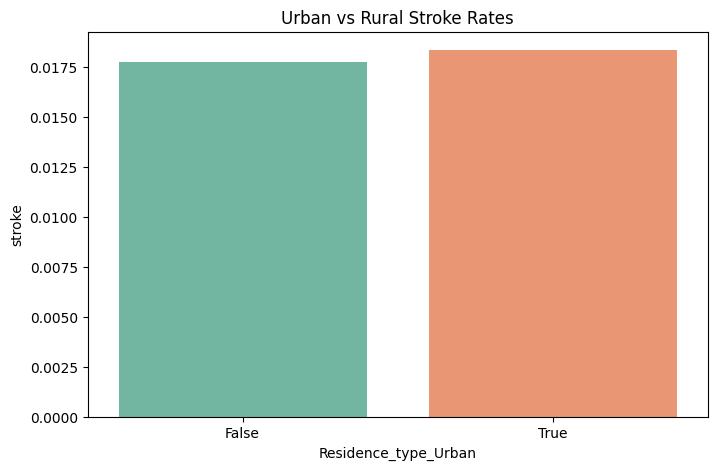

In [151]:
plt.figure(figsize=(8, 5))
# Assuming 'Residence_type' was renamed to 'Residence_type_Urban' during one-hot encoding
# Replace 'Residence_type_Urban' with the actual new column name if different
residence_stroke = df.groupby('Residence_type_Urban')['stroke'].mean().reset_index()
sns.barplot(x='Residence_type_Urban', y='stroke', data=residence_stroke, palette='Set2')
plt.title('Urban vs Rural Stroke Rates')
plt.show()

# Marital status analysis

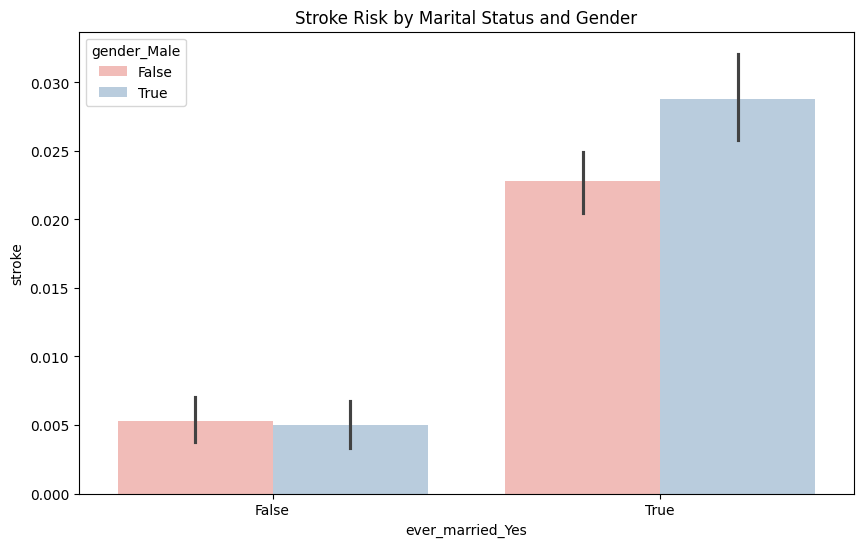

In [153]:
# Assuming 'ever_married' was one-hot encoded to 'ever_married_Yes'
plt.figure(figsize=(10, 6))
sns.barplot(x='ever_married_Yes', y='stroke', hue='gender_Male', data=df, palette='Pastel1') # Also update hue to the new gender column
plt.title('Stroke Risk by Marital Status and Gender')
plt.show()

# Stroke probability for hypertension patients

In [155]:
hypertension_df = df[df['hypertension'] == 1]
# Use the appropriate one-hot encoded column name for gender (e.g., 'gender_Male')
hypertension_stroke_prob = hypertension_df.groupby(['gender_Male', 'age'])['stroke'].mean().reset_index()
print("\nStroke Probability for Individuals with Hypertension:")
print(hypertension_stroke_prob)
fig = px.density_heatmap(hypertension_stroke_prob, x='age', y='gender_Male', z='stroke',  # Update y axis
                         title='Stroke Probability by Age and Gender (With Hypertension)',
                         labels={'stroke': 'Stroke Probability'},
                         color_continuous_scale='Reds')
fig.show()


Stroke Probability for Individuals with Hypertension:
     gender_Male   age    stroke
0          False  13.0  0.000000
1          False  15.0  0.000000
2          False  19.0  0.000000
3          False  20.0  0.000000
4          False  22.0  0.000000
..           ...   ...       ...
126         True  78.0  0.125000
127         True  79.0  0.177778
128         True  80.0  0.042553
129         True  81.0  0.170732
130         True  82.0  0.075000

[131 rows x 3 columns]


# Work type stratified analysis

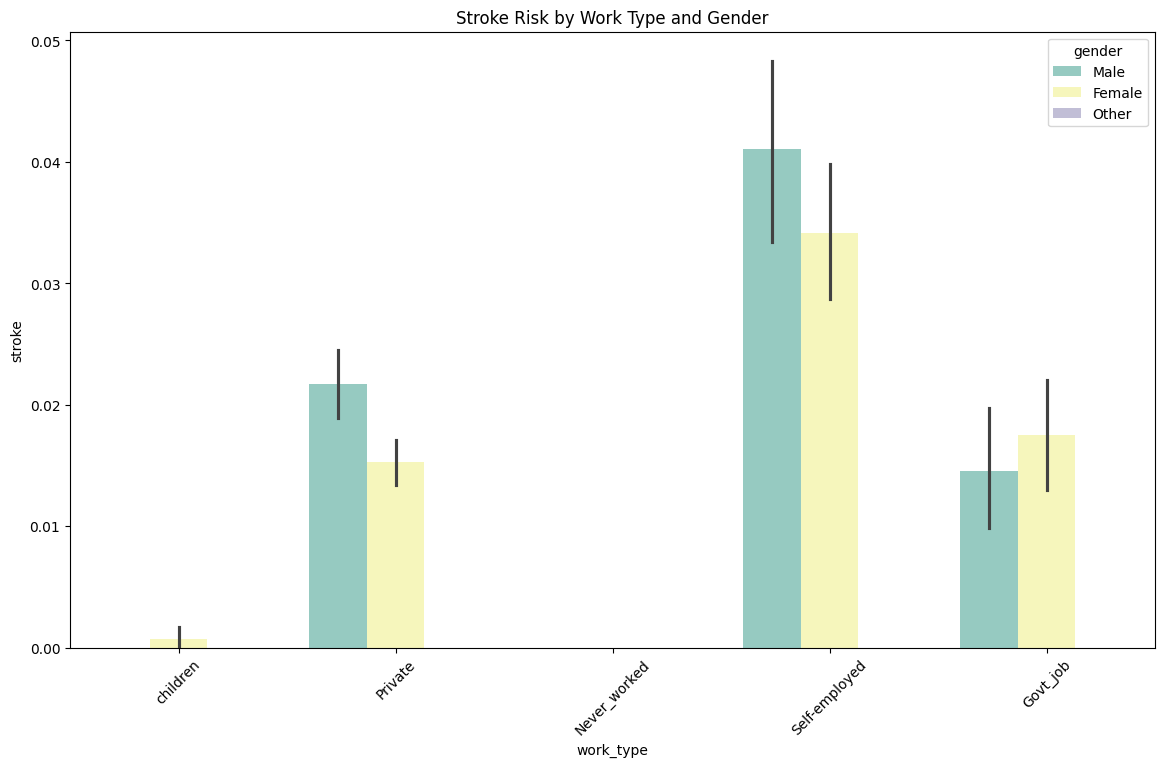

In [158]:
plt.figure(figsize=(14, 8))
# Use the original DataFrame 'eda_data' that contains the 'work_type' column
# Replace 'gender_Male' with 'gender' to use the original gender column
sns.barplot(x='work_type', y='stroke', hue='gender', data=eda_data, palette='Set3')
plt.title('Stroke Risk by Work Type and Gender')
plt.xticks(rotation=45)
plt.show()

# Machine Learning Feature Importance

<ipython-input-161-198b5a44a905>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




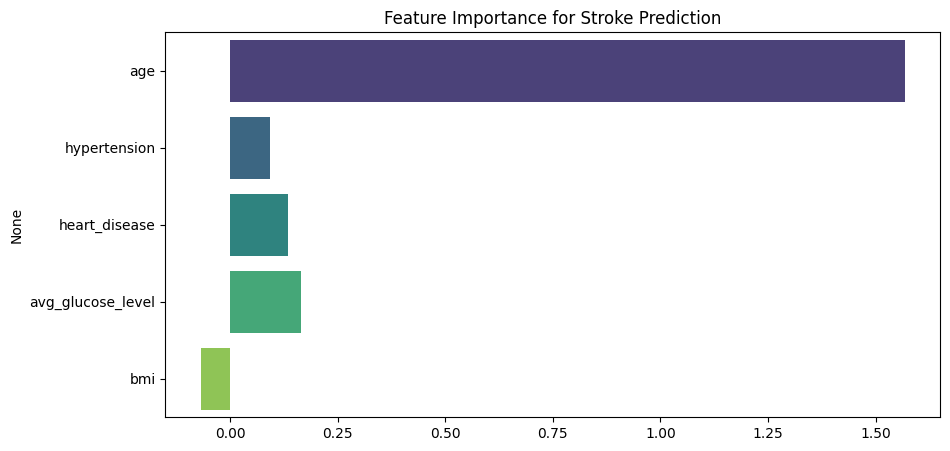

In [161]:
x=df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
y=df['stroke']
imputer=SimpleImputer(strategy='mean')
x=pd.DataFrame(imputer.fit_transform(x),columns=x.columns)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
model=LogisticRegression()
model.fit(x_scaled,y)
plt.figure(figsize=(10,5))
features=x.columns
importance=model.coef_[0]
sns.barplot(x=importance,y=features,palette='viridis')
plt.title('Feature Importance for Stroke Prediction')
plt.show()

# Missing data analysis

<ipython-input-162-40531f2096f5>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<function matplotlib.pyplot.show(close=None, block=None)>

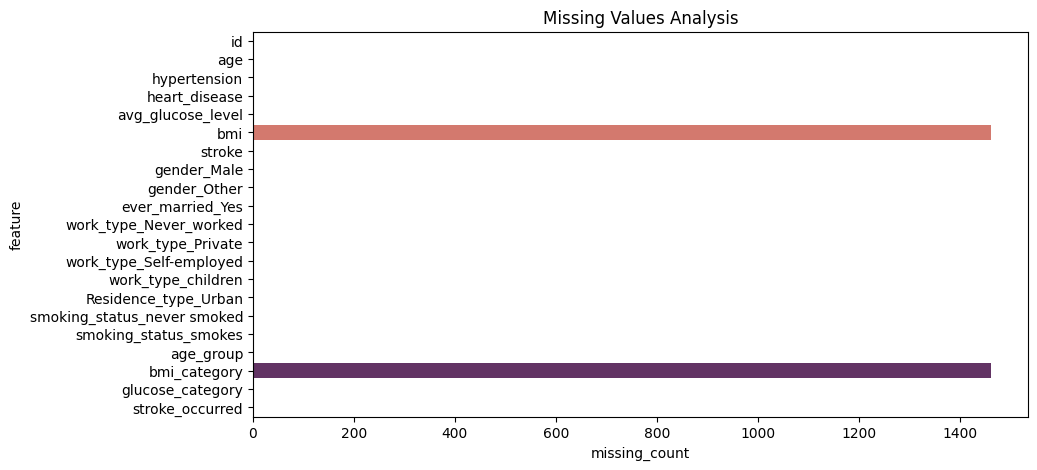

In [162]:
plt.figure(figsize=(10, 5))
missing = df.isnull().sum().reset_index()
missing.columns = ['feature', 'missing_count']
sns.barplot(x='missing_count', y='feature', data=missing, palette='flare')
plt.title('Missing Values Analysis')
plt.show

# Outlier detection

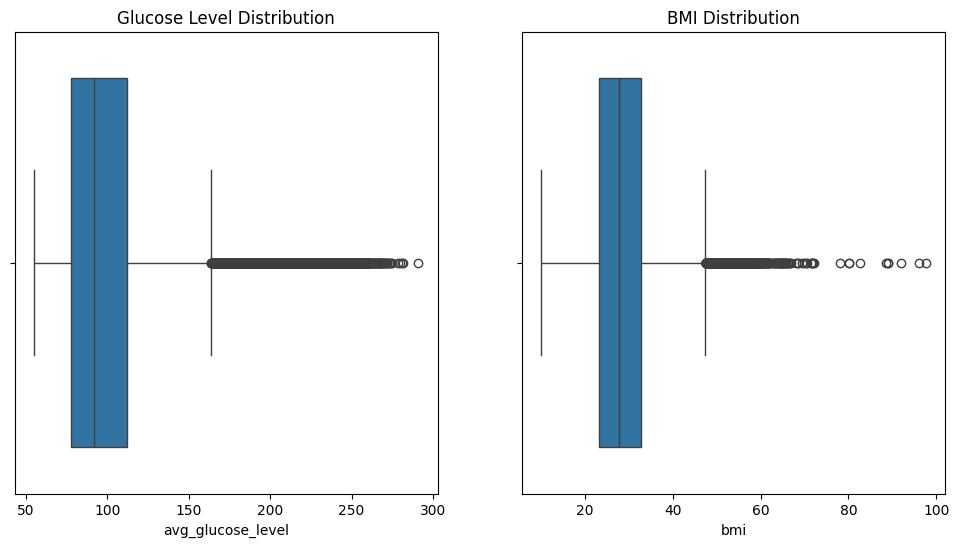

In [163]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['avg_glucose_level'])
plt.title('Glucose Level Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['bmi'])
plt.title('BMI Distribution')
plt.show()

# Age group analysis for stroke occurrences

#New EDA

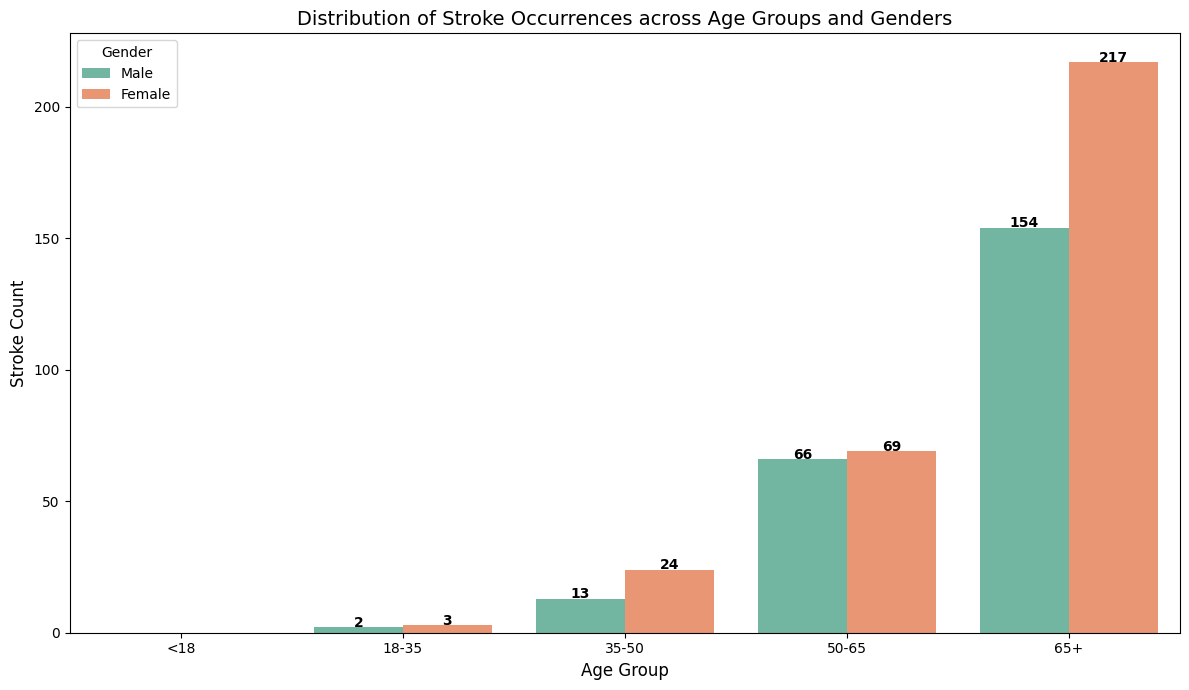

Plot with count labels generated successfully.


In [ ]:
# Load the dataset
eda_data =eda_data
# Create age groups/bins. Adjust bins according to the available age range.
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['<18', '18-35', '35-50', '50-65', '65+']
eda_data['age_group'] = pd.cut(eda_data['age'], bins=age_bins, labels=age_labels, right=False)

# Filter the dataframe to rows where stroke occurred
stroke_df = eda_data[eda_data['stroke'] == 1]

# Plot the distribution of stroke occurrences across age groups and genders
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=stroke_df, x='age_group', hue='gender', palette='Set2', order=age_labels)
plt.title('Distribution of Stroke Occurrences across Age Groups and Genders', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Stroke Count', fontsize=12)
plt.legend(title='Gender', fontsize=10)

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height) and height > 0:  # Only add text if the bar exists and has height
        ax.text(p.get_x() + p.get_width()/2., height + 0.1,
                int(height),
                ha="center", fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("Plot with count labels generated successfully.")

Missing smoking_status values: 0 out of 29072 rows

Average Glucose Levels by Work Type and Smoking Status:
smoking_status  formerly smoked  never smoked      smokes
work_type                                                
Govt_job             110.530455    106.338364  104.978653
Never_worked         116.894444     92.850588  122.901429
Private              108.882191    103.395346  104.701491
Self-employed        117.513756    110.244381  113.105941
children              90.059072     92.296693  102.961111


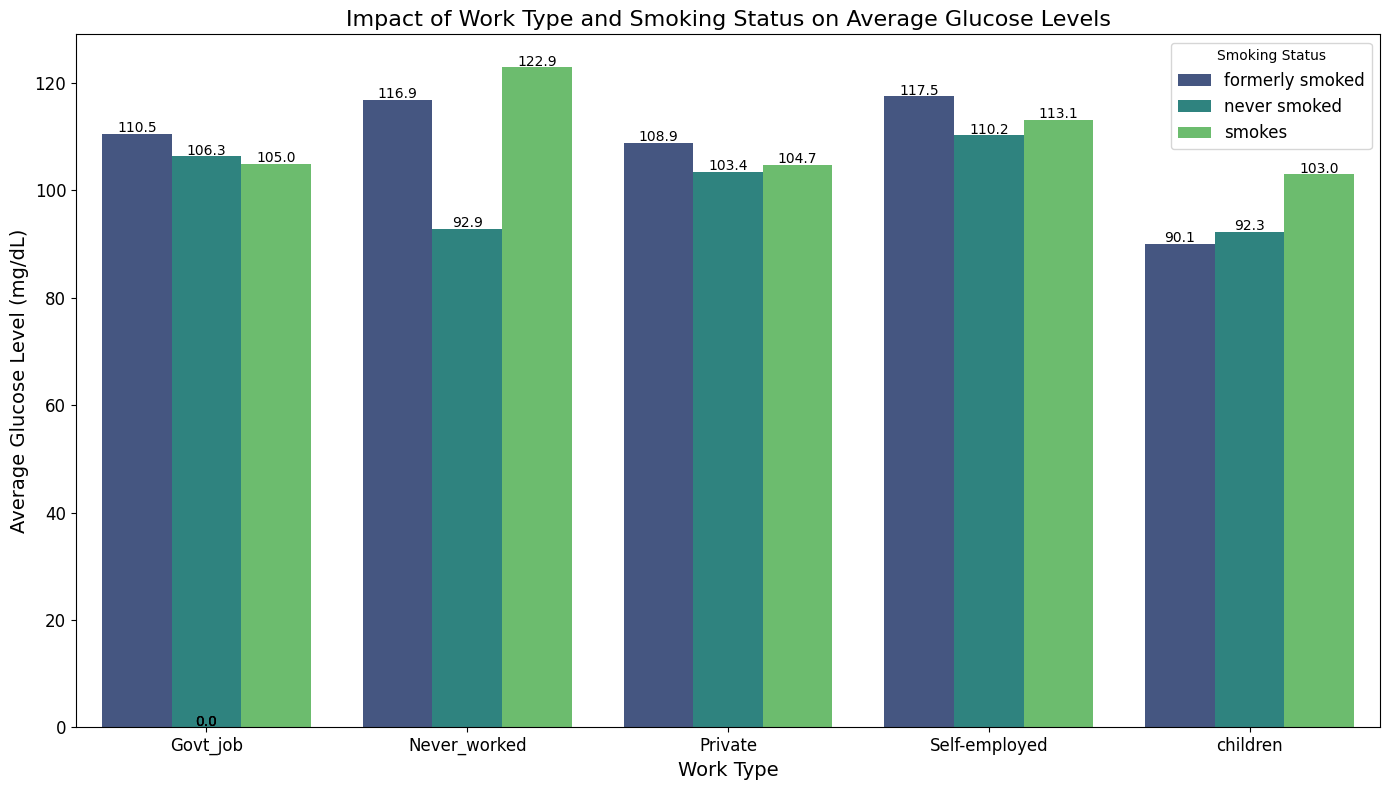

In [ ]:
# Handle missing values in smoking_status by creating a separate category for unknown values
print("Missing smoking_status values: " + str(eda_data['smoking_status'].isna().sum()) + " out of " + str(len(eda_data)) + " rows")
eda_data['smoking_status'] = eda_data['smoking_status'].fillna('Unknown')

# Calculate average glucose levels by work_type and smoking_status
glucose_by_work_smoking = eda_data.groupby(['work_type', 'smoking_status'])['avg_glucose_level'].mean().reset_index()
# Create a pivot table for easier visualization
pivot_table = glucose_by_work_smoking.pivot(index='work_type', columns='smoking_status', values='avg_glucose_level')
print("\nAverage Glucose Levels by Work Type and Smoking Status:")
print(pivot_table)

# Visualize the data with a grouped bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='work_type', y='avg_glucose_level', hue='smoking_status', data=glucose_by_work_smoking, palette='viridis')
plt.title('Impact of Work Type and Smoking Status on Average Glucose Levels', fontsize=16)
plt.xlabel('Work Type', fontsize=14)
plt.ylabel('Average Glucose Level (mg/dL)', fontsize=14)
plt.legend(title='Smoking Status', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.3, f'{height:.1f}', ha="center", fontsize=10)

plt.tight_layout()
plt.show()